# Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM) to predict the Opening stock price using past 60 day stock price.

In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
ticker = 'AAPL'

In [3]:
#Get stock quote
df=web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')    #YYYY-MM-DD
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-05-18,316.500000,310.320007,313.170013,314.959991,33843100.0,314.959991
2020-05-19,318.519989,313.010010,315.029999,313.140015,25432400.0,313.140015
2020-05-20,319.519989,316.519989,316.679993,319.230011,27876200.0,319.230011


In [4]:
df.shape

(2111, 6)

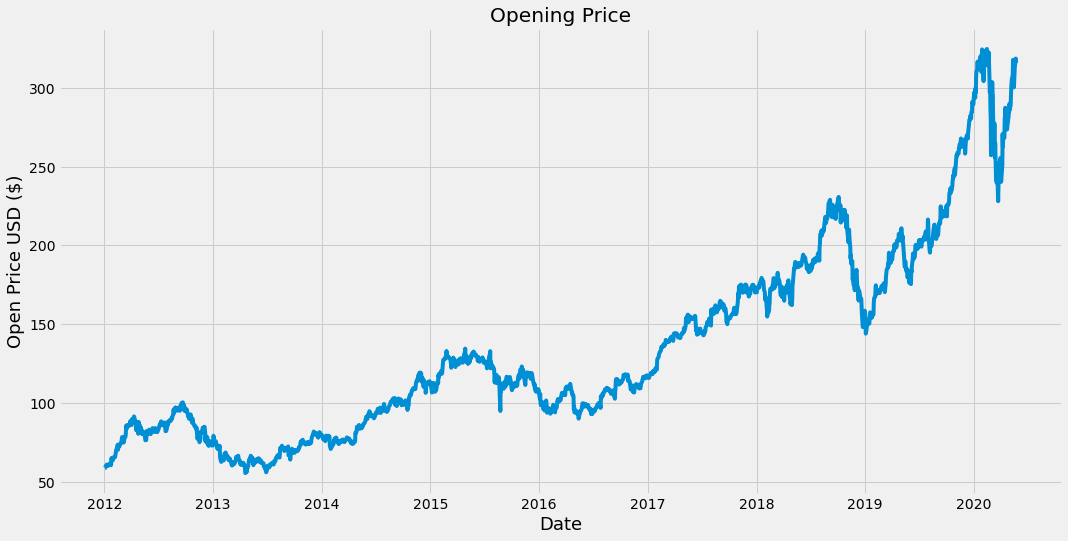

In [5]:
plt.figure(figsize=(16,8))
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [6]:
data=df.filter(['Open'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1689

In [7]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [8]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01136743, 0.01168571, 0.01431141, 0.01686815, 0.01990759,
       0.02012507, 0.01841175, 0.01819956, 0.01683101, 0.01921801,
       0.02068205, 0.02237417, 0.02096318, 0.01840643, 0.01969542,
       0.03525867, 0.03203357, 0.02990118, 0.03062788, 0.03586867,
       0.03736454, 0.03603312, 0.03677576, 0.03734862, 0.04099279,
       0.04377762, 0.04921998, 0.05463053, 0.05917643, 0.06189761,
       0.06698988, 0.05491696, 0.06107542, 0.06307521, 0.06636396,
       0.06742484, 0.06985959, 0.07072951, 0.07425699, 0.08147103,
       0.08497726, 0.08289263, 0.08351856, 0.07197607, 0.07894612,
       0.07782687, 0.08287671, 0.08540693, 0.08994755, 0.10082698,
       0.11226335, 0.10436502, 0.11160561, 0.11221032, 0.11392365,
       0.11129264, 0.11273015, 0.11235885, 0.11574839, 0.1222198 ])]
[0.11924932155323034]



In [9]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1629, 60, 1)

In [11]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=1)

Epoch 1/1
1629/1629 [==============================] - 74s 46ms/step - loss: 6.0620e-04


In [14]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    


In [15]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [16]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [17]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [18]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



12.474907753026882

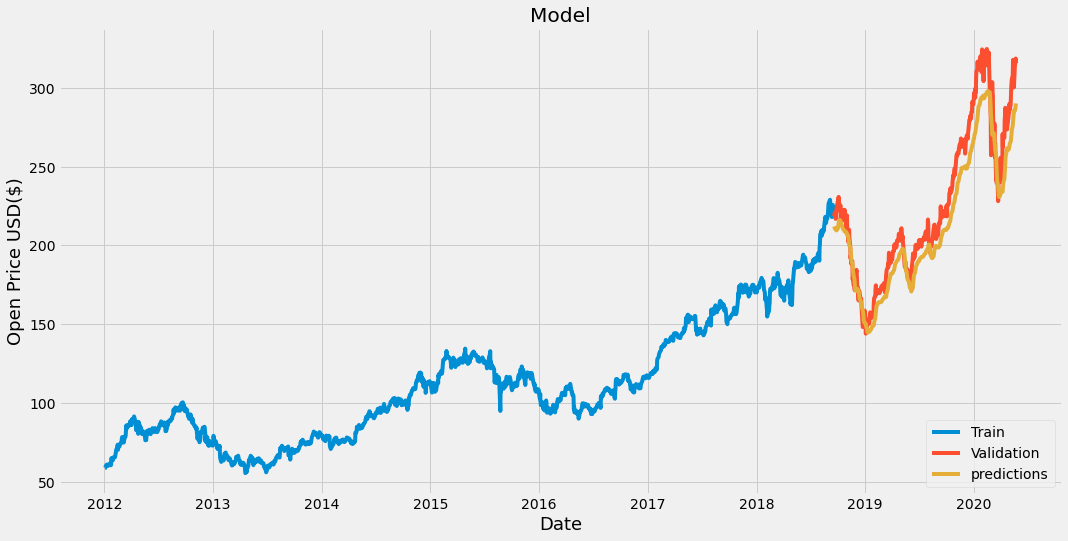

In [19]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'predictions']])
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('Images/prediction.png')
plt.show()

In [20]:
#Show the valid and predicted prices

valid.tail(15)

,Open,predictions
Date,,
2020-05-04,289.170013,265.793304
2020-05-05,295.059998,266.971558
2020-05-06,300.459991,268.643951
2020-05-07,303.220001,270.909485
2020-05-08,305.640015,273.455475
2020-05-11,308.100006,276.072571
2020-05-12,317.829987,278.656067
2020-05-13,312.149994,281.951630
2020-05-14,304.510010,284.502686


In [21]:
#Get the quote
stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

Opening Price of AAPL tomorrow:[[291.2055]]
